
# Goal
The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.
# Metric
This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

# Submission File Format
The file should contain a header and have the following format:

ImageId,Label
* 1,0
* 2,0
* 3,0
* etc.


<a id="数据集"></a> <br>
# 数据集概览
* 在本教程中，我们将使用“手语数字数据集”。
* 该数据集中包含2062张手语数字图片。
* 数字范围是从0到9。因此共有10个不同的手势。
* 为了简化起见，我们仅使用手势0和1。
* 准备我们的X和Y数组。X是图像数组（手势零和一手势），Y是标签数组（0和1）。

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [4]:
# 先用pandas读入csv
from sklearn.model_selection import train_test_split
df = pd.read_csv('train.csv')
Y = df.iloc[:, 0].values   # 标签数据
X = df.iloc[:, 1:].values  # 特征数据
np.save("X.npy", X)
np.save("Y.npy", Y)
X_train = np.load('X.npy')
Y_train = np.load('Y.npy')

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("数据形状:", X_train.shape) 
print("数据形状:", Y_train.shape) 
print("数据形状:", X_test.shape) 
print("数据形状:", Y_test.shape) 



数据形状: (35700, 784)
数据形状: (35700,)
数据形状: (6300, 784)
数据形状: (6300,)


数据形状: (42000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
数据形状: (42000,)
[1 0 1 4 0 0 7 3 5 3]


(-0.5, 27.5, 27.5, -0.5)

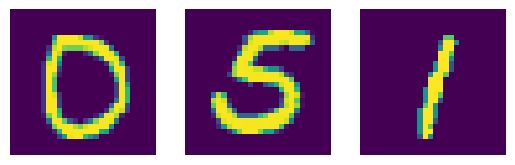

In [5]:
# load data set
img_size = 28
dataX = np.load('X.npy') # 查看数据形状
print("数据形状:", dataX.shape) # 打印前五行数据 
print(dataX[:10])
dataY = np.load('Y.npy') # 查看数据形状
print("数据形状:", dataY.shape) # 打印前五行数据

print(dataY[:10])

plt.subplot(1, 3, 1)
plt.imshow(dataX[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dataX[900].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dataX[1500].reshape(img_size, img_size))
plt.axis('off')

* 为手势零的图像创建标签数组，其值为0，为一手势的图像创建标签数组，其值为1

In [6]:
Y_test = Y_test.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
print("Y_test shape: ", Y_test.shape)
print("Y_train shape: ", Y_train.shape)
print("X_shape: " , X.shape)
print("Y_shape: " , Y.shape)
print("X_test shape: " , X_test.shape)
print("Y_test shape: " , Y_test.shape)

Y_test shape:  (6300, 1)
Y_train shape:  (35700, 1)
X_shape:  (42000, 784)
Y_shape:  (42000,)
X_test shape:  (6300, 784)
Y_test shape:  (6300, 1)


In [7]:
# sample_size = 5000 # 选择较小的样本数量
# sample_size = min(5000, X_test.shape[0])
# indices = np.random.choice(X_test.shape[0], sample_size, replace=False)
# X = X[indices]
# Y = Y[indices]
# X_test = X_test[indices]
# Y_test = Y_test[indices]


In [8]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]
print("X_train number: " , number_of_train)
print("X_test number: " , number_of_test)

X_train number:  35700
X_test number:  6300


* 为方便后续矩阵乘法的计算，对样本矩阵进行转置

In [9]:
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (35700, 784)
x test:  (6300, 784)
y train:  (35700,)
y test:  (6300,)


In [10]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


<!-- <a id="10"></a> <br>
# 深度神经网络(DNN)
* 2-layer 感知机: 
    * 神经网络结构： 包括输入层、一个或多个隐藏层以及输出层。
    * 激活函数： 激活函数提供了非线性变换，使模型具备拟合复杂数据的能力。tanh激活函数比sigmoid更适合用于隐藏单元，因为它的输出均值更接近于零，从而更好地中心化数据以供下一层使用。

<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>

   
    
     -->

# AdaBoost

In [11]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

Core_Size = 3

class CNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_shape=(28, 28, 1), num_classes=10, epochs=3, batch_size=32):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self._build_model()
        self.n_classes_ = num_classes

    def _build_model(self):
        model = Sequential([
            Conv2D(32, (Core_Size, Core_Size), activation='relu', input_shape=self.input_shape, padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (Core_Size, Core_Size), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (Core_Size, Core_Size), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(self.num_classes, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model
    
    def fit(self, X, y, sample_weight=None):
        # 设置类标签数量
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        print(f"Fit called with sample_weight: {sample_weight}")
        
        if sample_weight is not None:
            if len(sample_weight) != len(X):
                raise ValueError("sample_weight length must be equal to number of samples")
            # 通过复制样本实现权重
            sample_weight = sample_weight / np.sum(sample_weight)  # 归一化权重
            sample_weight = (sample_weight * len(sample_weight)).astype(int)  # 扩展权重到整数倍
            X_new = np.repeat(X, sample_weight, axis=0)
            y_new = np.repeat(y, sample_weight, axis=0)
        else:
            X_new, y_new = X, y
        
        self.model.fit(X_new, y_new, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        # 在每个弱分类器训练完之后打印其准确率
        for epoch in range(self.epochs):
            self.model.fit(X_new, y_new, epochs=1, batch_size=self.batch_size, verbose=0)
            y_pred = self.model.predict(X_new)
            accuracy = accuracy_score(y_new, np.argmax(y_pred, axis=1))
            print(f"Epoch {epoch + 1}/{self.epochs}, Accuracy: {accuracy:.8f}")

        return self
    
    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    
    def predict_proba(self, X):
        return self.model.predict(X)
    

# 确保数据形状
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))

# 确保标签为一维整数数组
y_train_int = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
y_test_int = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# 初始化CNN弱学习器
cnn_weak_learner = CNNClassifier(epochs= 2)  # 使用较少的epoch数作为弱学习器

# 初始化AdaBoost分类器，使用自定义的CNN弱学习器
ada = AdaBoostClassifier(estimator=cnn_weak_learner, n_estimators=10, learning_rate=1.0, algorithm='SAMME')

# 训练模型
try:
    ada.fit(X_train_reshaped, y_train_int)
except TypeError as e:
    print(f"Error during model training: {e}")

# 进行预测
y_pred_train = ada.predict(X_train_reshaped)
y_pred_test = ada.predict(X_test_reshaped)

# 计算准确率
train_accuracy = accuracy_score(y_train_int, y_pred_train)
test_accuracy = accuracy_score(y_test_int, y_pred_test)

print("Train Accuracy: {:.8f}%".format(train_accuracy * 100))
print("Test Accuracy: {:.8f}%".format(test_accuracy * 100))


Fit called with sample_weight: [2.80112045e-05 2.80112045e-05 2.80112045e-05 ... 2.80112045e-05
 2.80112045e-05 2.80112045e-05]
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 1/2, Accuracy: 0.99207283
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Epoch 2/2, Accuracy: 0.99084034
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fit called with sample_weight: [2.82701495e-06 2.82701495e-06 2.82701495e-06 ... 2.82701495e-06
 2.82701495e-06 2.82701495e-06]
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/2, Accuracy: 1.00000000
1002/1002 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 2/2, Accuracy: 1.00000000
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fit called with sample_weight: [2.97611962e-07 5.07843359e-05 5.07843359e-05 ... 5.07843359e-05
 5.07843359e-05 2.97611962e-07]
656/656 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 1/2, Accuracy: 0.98780488
656/656 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Epoch 2/2, Accuracy: 0.98318407
1116/1116 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
Fit called with sample_weight: [3.0296384

# 分割后的AdaBoost

In [12]:
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.base import BaseEstimator, ClassifierMixin

class CNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_shape=(28, 28, 1), num_classes=10, epochs=3, batch_size=32):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = self._build_model()
        self.n_classes_ = num_classes
    
    def _build_model(self):
        model = Sequential([
            Conv2D(32, (5, 5), activation='relu', input_shape=self.input_shape, padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(64, (5, 5), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Conv2D(128, (5, 5), activation='relu', padding='same'),
            MaxPooling2D(pool_size=(2, 2)),
            Flatten(),
            Dense(128, activation='relu'),
            Dense(self.num_classes, activation='softmax')
        ])
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model
    
    def fit(self, X, y, sample_weight=None):
        # 设置类标签数量
        self.classes_ = np.unique(y)
        self.n_classes_ = len(self.classes_)
        print(f"Fit called with sample_weight: {sample_weight}")
        
        if sample_weight is not None:
            if len(sample_weight) != len(X):
                raise ValueError("sample_weight length must be equal to number of samples")
            # 通过复制样本实现权重
            sample_weight = sample_weight / np.sum(sample_weight)  # 归一化权重
            sample_weight = (sample_weight * len(sample_weight)).astype(int)  # 扩展权重到整数倍
            X_new = np.repeat(X, sample_weight, axis=0)
            y_new = np.repeat(y, sample_weight, axis=0)
        else:
            X_new, y_new = X, y
        
        self.model.fit(X_new, y_new, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=1)
    
    def predict_proba(self, X):
        return self.model.predict(X)

# 确保数据形状
X_train_reshaped = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], 28, 28, 1))

# 确保标签为一维整数数组
y_train_int = np.argmax(y_train, axis=1) if len(y_train.shape) > 1 else y_train
y_test_int = np.argmax(y_test, axis=1) if len(y_test.shape) > 1 else y_test

# 分割数据集
def split_data(X, y, n_splits=10):
    X_splits = np.array_split(X, n_splits)
    y_splits = np.array_split(y, n_splits)
    return X_splits, y_splits

X_splits, y_splits = split_data(X_train_reshaped, y_train_int, n_splits=10)

# 初始化并训练AdaBoost分类器，使用自定义的CNN弱学习器
cnn_weak_learner = CNNClassifier(epochs=1)  # 使用较少的epoch数作为弱学习器

# 自己管理弱学习器的训练过程
weak_learners = []
for i in range(10):
    learner = CNNClassifier(epochs=2)
    X_sub, y_sub = X_splits[i], y_splits[i]  # 使用第i个子集
    learner.fit(X_sub, y_sub)
    weak_learners.append(learner)
    accuracy = accuracy_score(y_sub, learner.predict(X_sub))
    print(f"Weak learner {i+1} accuracy: {accuracy:.2f}")

# 集成结果
y_pred_train = np.zeros_like(y_train_int)
for learner in weak_learners:
    y_pred_train += learner.predict(X_train_reshaped)

y_pred_train = np.round(y_pred_train / len(weak_learners)).astype(int)
train_accuracy = accuracy_score(y_train_int, y_pred_train)
print("Train Accuracy: {:.2f}%".format(train_accuracy * 100))

y_pred_test = np.zeros_like(y_test_int)
for learner in weak_learners:
    y_pred_test += learner.predict(X_test_reshaped)

y_pred_test = np.round(y_pred_test / len(weak_learners)).astype(int)
test_accuracy = accuracy_score(y_test_int, y_pred_test)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 1 accuracy: 0.98
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 2 accuracy: 0.98
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 3 accuracy: 0.97
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 4 accuracy: 0.93
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 5 accuracy: 0.98
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 6 accuracy: 0.98
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 7 accuracy: 0.98
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 8 accuracy: 0.98
Fit called with sample_weight: None
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Weak learner 9 accuracy: 0.98
Fit called with sample_weight: None
1